# Import packages

In [257]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce
from scipy import stats

from sklearn.preprocessing import StandardScaler


# Functions

- This function is to read csv files saved with the first row that holds the dtypes of all columns. https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv

In [258]:
def read_csv(path):
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path,    
              nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

# Load datasets

In [259]:
# read csv using the above function
demographics = read_csv("CustomerDemographic.csv")
addresses = read_csv("CustomerAddress.csv")
transactions = read_csv("Transactions.csv")

In [260]:
demographics.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67


In [261]:
addresses.head(1)

,customer_id,new_address,postcode,state,property_valuation
0,1,60 Morning Avenue,2016,NSW,10


In [262]:
transactions.head(1)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04


# Data Transformation

In [263]:
# Simplify job_title into 9 categories

dic = {'Account': 'Professional',
       'Accountant': 'Professional',
       'Technical': 'Professional',
       'Actuary': 'Professional',
       'Analyst': 'Professional',
       'Professor': 'Professional',
       'Teacher': 'Professional',
       'Scientist': 'Professional',
       'Social': 'Community and personal service workers',
       'Advisor': 'Professional',
       'Payment': 'Professional',
       'Specialist': 'Professional',
       'Legal': 'Professional',
       'Paralegal': 'Professional',
       'Biostatistician': 'Professional',
       'Geologist': 'Professional',
       'Statistician': 'Professional',
       'Data': 'Professional',
       'Tech': 'Professional',
       'Programmer': 'Professional',
       'Software': 'Professional',
       'Dental': 'Professional',
       'Health': 'Professional',
       'Nurse': 'Professional',
       'Pharmacist': 'Professional',
       'Pathologist': 'Professional',
       'Therapist': 'Professional',
       'Therapy': 'Professional',
       'Engineer': 'Professional',
       'Chemist': 'Professional',
       'Research': 'Professional',
       'Developer': 'Professional',
       'Marketing': 'Professional',
       'Technician': 'Technician and trade workers',
       'Designer': 'Technician and trade workers',
       'Editor': 'Technician and trade worker',
       'Planner': 'Others',
       'Auditor': 'Others',
       'job_title': 'Others',
       'Office Assistant': 'Others',
       'Unknown': 'Others',
       'Administrative': 'Clerical and admin workers',
       'Administrator': 'Clerical and admin workers',
       'Secretary': 'Clerical and admin workers',
       'Help Desk': 'Clerical and admin workers',
       'Human Resources': 'Clerical and admin workers',
       'Recruiter': 'Clerical and admin workers',
       'Librarian': 'Clerical and admin workers',
       'Administrator': 'Clerical and admin workers', 
       'Manager': 'Manager',
       'Director': 'Manager',
       'Executive': 'Manager',
       'VP': 'Manager',
       'Operator': 'Operators and drivers',
       'Sales': 'Sales workers'}

In [264]:
demographics['job_category'] = demographics['job_title']

for k, v in dic.items():
    demographics['job_category'] = np.where(demographics['job_title'].str.contains(k, case=False), v, demographics['job_category'])

In [265]:
# Categorize customers into generations

# Create year column for binning
demographics['birth_year'] = demographics['DOB'].dt.year

# Bin the birthyear column into generations
bins= [1900, 1945, 1964, 1976, 1995, 2015]
labels = ['Traditionalists','Baby boomers','Gen X','Millennials','Gen Z']
demographics['generation'] = pd.cut(demographics['birth_year'], bins=bins, labels=labels, right=False)

In [266]:
# Bin the Age column into life stage column
bins= [0, 18, 35, 50, 65, 130]
labels = ['Youth','Young Adults','Middle Age','Advanced Age','Retired Age']
demographics['age_group'] = pd.cut(demographics['Age'], bins=bins, labels=labels, right=False)

In [267]:
scores = [1, 2, 3, 4]

purchases_scores = pd.qcut(demographics["past_3_years_bike_related_purchases"], q = 4, labels=scores)
tenure_scores = pd.qcut(demographics["tenure"], q = 4, labels=scores)

demographics['purchases_score'] = purchases_scores
demographics['tenure_score'] = tenure_scores

demographics

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,job_category,birth_year,generation,age_group,purchases_score,tenure_score
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,67,Manager,1953,Baby boomers,Retired Age,4,3
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40,Clerical and admin workers,1980,Millennials,Middle Age,4,4
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,67,Manager,1954,Baby boomers,Retired Age,3,3
3,4,Talbot,Unknown,Male,33,1961-10-03,Unknown,IT,Mass Customer,No,7.0,59,Others,1961,Baby boomers,Advanced Age,2,2
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,Yes,8.0,44,Technician and trade worker,1977,Millennials,Middle Age,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No,19.0,45,Manager,1975,Gen X,Middle Age,1,4
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,Yes,1.0,19,Professional,2001,Gen Z,Young Adults,4,1
3997,3998,Sarene,Woolley,Unknown,60,1978-01-30,Assistant Manager,IT,High Net Worth,No,1.0,43,Manager,1978,Millennials,Middle Age,3,1
3998,3999,Patrizius,Unknown,Male,11,1973-10-24,Unknown,Manufacturing,Affluent Customer,Yes,10.0,47,Others,1973,Gen X,Middle Age,1,2


In [268]:
# Drop unnessary columns

# demographics.drop(['first_name', 'last_name', 'job_title', 'birth_year', 'DOB'], axis=1, inplace = True)
demographics = demographics[['customer_id', 'gender', 'generation', 'age_group', 'job_category', 'job_industry_category', 'tenure_score', 'wealth_segment', 'owns_car', 'purchases_score']]

In [269]:
demographics

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3
...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,Gen X,Middle Age,Manager,Health,4,Mass Customer,No,1
3996,3997,Female,Gen Z,Young Adults,Professional,Manufacturing,1,High Net Worth,Yes,4
3997,3998,Unknown,Millennials,Middle Age,Manager,IT,1,High Net Worth,No,3
3998,3999,Male,Gen X,Middle Age,Others,Manufacturing,2,Affluent Customer,Yes,1


In [270]:
addresses

,customer_id,new_address,postcode,state,property_valuation
0,1,60 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9
...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,3
3995,4000,57042 Village Green Point,4511,QLD,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,10
3997,4002,8194 Lien Street,4032,QLD,7


In [271]:
addresses = addresses[['customer_id', 'postcode', 'state', 'property_valuation']]

In [272]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,1.0,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23
19441,19997,41,127,2017-11-09,1.0,Solex,Road,medium,medium,416.98,312.74,1997-05-12
19442,19998,87,2284,2017-04-14,1.0,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22
19443,19999,6,2764,2017-07-03,0.0,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19


In [273]:
# Create a new column for the profit of each transaction

transactions["order_profit"] = transactions.list_price - transactions.standard_cost

In [274]:
# Last date
last_date = transactions["transaction_date"].max()

In [275]:
# Create RFM Modelling scores
rfm_scores = transactions.groupby("customer_id").agg({
    "transaction_date": lambda x: (last_date - x.max()).days,
    "transaction_id": lambda x: len(x),
    "order_profit": lambda x: sum(x)})

rfm_scores

,transaction_date,transaction_id,order_profit
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


In [276]:
# Rename the columns
rfm_scores.columns = ["recency", "frequency", "monetary"]
rfm_scores

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.090000
2,128,3,2226.260000
3,102,7,3290.210000
4,195,2,220.570000
5,16,6,2394.940000
...,...,...,...
3497,52,3,1648.320000
3498,127,6,3147.330000
3499,51,7,4955.250000


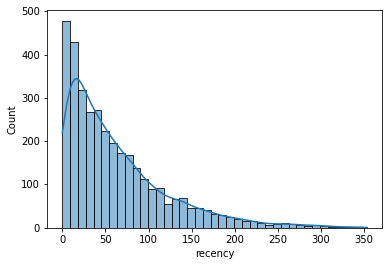

In [277]:
# Plotting the distribution
ax = sns.histplot(rfm_scores["recency"], kde=True)

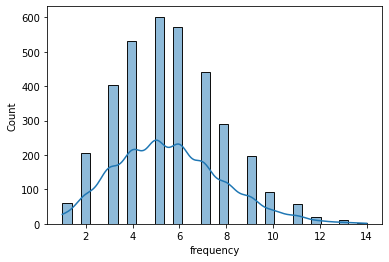

In [278]:
ax = sns.histplot(rfm_scores["frequency"], kde=True)

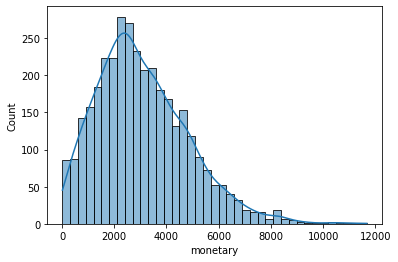

In [279]:
ax = sns.histplot(rfm_scores["monetary"], kde=True)


In [280]:
rfm_scores['recency'].values[rfm_scores['recency'].values == 0] = 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.27314707636038854


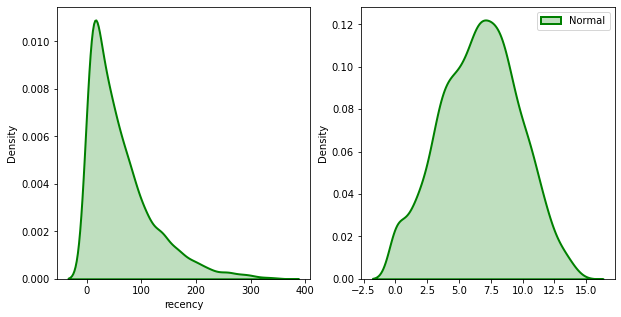

In [281]:

# transform training data & save lambda value

original_recency = rfm_scores["recency"]
fitted_recency, fitted_lambda_recency = stats.boxcox(original_recency)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_recency, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_recency, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_recency}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.6023403109226256


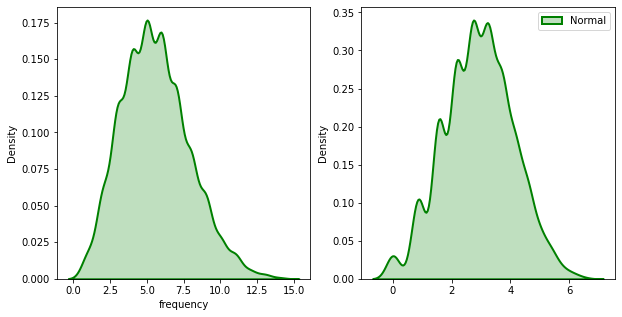

In [282]:

# transform training data & save lambda value

original_freq = rfm_scores["frequency"]
fitted_freq, fitted_lambda_freq = stats.boxcox(original_freq)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_freq, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_freq, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_freq}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.5489066493231521


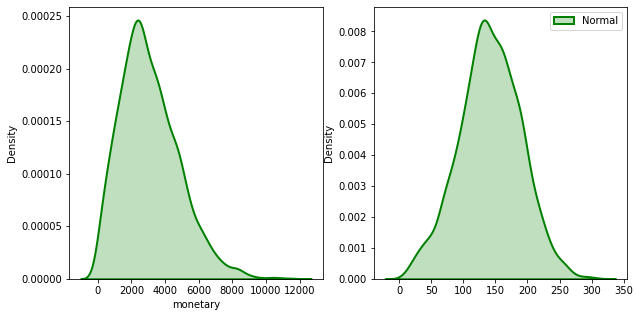

In [283]:

# transform training data & save lambda value

original_monetary = rfm_scores["monetary"]
fitted_monetary, fitted_lambda_monetary = stats.boxcox(original_monetary)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_monetary, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_monetary, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda_monetary}")

In [284]:
rfm_scores['recency'] = fitted_recency
rfm_scores['frequency'] = fitted_freq
rfm_scores['monetary'] = fitted_monetary

In [285]:
rfm_df = rfm_scores.copy()

In [286]:
# def rfm_tier(value, index, quantile):
#     # If the index is recency, then the lower recency, the higher tier
#     if value <= quantile[index][0.25]:
#         if index == "recency":
#             return 1
#         else:
#             return 4
#     elif value <= quantile[index][0.50]:
#         if index == "recency":
#             return 2
#         else:
#             return 3
#     elif value <= quantile[index][0.75]:
#         if index == "recency":
#             return 3
#         else:
#             return 2
#     else:
#         if index == "recency":
#             return 4
#         else:
#             return 1

In [287]:
# # Assigning tier values to R, F, and M for each customer


# # Using quantiles to classify customers, setting into 4 segments
# quantiles = rfm_scores.quantile([0.25, 0.5, 0.75])
# quantiles = quantiles.to_dict()

# index_list = {"R": "recency", "F": "frequency", "M": "monetary"}
# for k, v in index_list.items():
#     rfm_scores[k] = rfm_scores[v].apply(rfm_tier, args=(v, quantiles))

# rfm_scores

In [288]:
# # Assigning rfm_group to each customer by concatenating R, F, and M
# rfm_scores["rfm_group"] = rfm_scores["R"].map(str) + rfm_scores["F"].map(str) + rfm_scores["M"].map(str)

# # Calculating the rfm score for each customer by sum them
# rfm_scores["rfm_score"] = rfm_scores[["R", "F", "M"]].sum(axis=1)

# rfm_scores.head(10)

In [289]:
# # Assigning loyalty tier to each customer
# loyalty_tier = ["titanium", "platinum", "gold", "silver"]

# # Using pandas quantile cut
# score_cuts = pd.qcut(rfm_scores["rfm_score"], q = 4, labels=loyalty_tier)


# # Create a new column for the loyalty tier
# rfm_scores["loyalty_tier"] = score_cuts
# rfm_scores.head(10)

In [290]:
transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,order_profit
0,1,2,2950,2017-02-25,0.0,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,17.87
1,2,3,3120,2017-05-21,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,1702.55
2,3,37,402,2017-10-16,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,1544.61
3,4,88,3135,2017-08-31,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,817.36
4,5,78,787,2017-10-01,1.0,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-23,802.26
19441,19997,41,127,2017-11-09,1.0,Solex,Road,medium,medium,416.98,312.74,1997-05-12,104.24
19442,19998,87,2284,2017-04-14,1.0,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-22,1592.19
19443,19999,6,2764,2017-07-03,0.0,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-19,91.15


In [291]:
# Create a new column "Average order value"
transactions["order_profit"] = transactions.list_price - transactions.standard_cost

In [292]:
# aggregate customer based on brand interaction

brand_int = transactions.groupby(["customer_id", "brand"], as_index = False)['transaction_id'].mean()
brand_int = brand_int.rename(columns = {'transaction_id':'total_transactions'})
brand_int.head(10)

,customer_id,brand,total_transactions
0,1,Giant Bicycles,15802.000000
1,1,Norco Bicycles,12135.500000
2,1,OHM Cycles,8258.500000
3,1,Solex,8594.500000
4,1,Trek Bicycles,5157.000000
5,2,Giant Bicycles,2261.000000
6,2,WeareA2B,11577.000000
7,3,Giant Bicycles,10653.500000
8,3,Norco Bicycles,14071.000000
9,3,Trek Bicycles,14855.666667


In [293]:
brand_int.dtypes

customer_id             int64
brand                  object
total_transactions    float64
dtype: object

In [294]:
favourite_brand = []

# customers_list = np.arange(1, 4001, 1).tolist()
customers_list = brand_int['customer_id'].unique().tolist()

for r in customers_list:
  df_temp = brand_int[brand_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_brand.append(df_temp.iloc[max_index,1])

In [295]:
transaction_df = pd.DataFrame({
                              'customer_id': customers_list,
                               'favourite_brand': favourite_brand
})

In [296]:
transaction_df

,customer_id,favourite_brand
0,1,Giant Bicycles
1,2,WeareA2B
2,3,Trek Bicycles
3,4,Solex
4,5,Solex
...,...,...
3487,3497,Giant Bicycles
3488,3498,Trek Bicycles
3489,3499,Norco Bicycles
3490,3500,OHM Cycles


In [297]:
productline_int = transactions.groupby(["customer_id", "product_line"], as_index = False)['transaction_id'].count()
productline_int = productline_int.rename(columns = {'transaction_id':'total_transactions'})
productline_int

,customer_id,product_line,total_transactions
0,1,Mountain,1
1,1,Road,3
2,1,Standard,7
3,2,Standard,3
4,3,Mountain,1
...,...,...,...
7214,3499,Touring,1
7215,3500,Road,1
7216,3500,Standard,5
7217,5034,Road,2


In [298]:
favourite_line= []

for r in customers_list:
  df_temp = productline_int[productline_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_line.append(df_temp.iloc[max_index,1])

In [299]:
transaction_df['favourite_line'] = favourite_line

In [300]:
transaction_df

,customer_id,favourite_brand,favourite_line
0,1,Giant Bicycles,Standard
1,2,WeareA2B,Standard
2,3,Trek Bicycles,Road
3,4,Solex,Standard
4,5,Solex,Road
...,...,...,...
3487,3497,Giant Bicycles,Standard
3488,3498,Trek Bicycles,Standard
3489,3499,Norco Bicycles,Standard
3490,3500,OHM Cycles,Standard


In [301]:
product_class_int = transactions.groupby(["customer_id", "product_class"], as_index = False)['transaction_id'].count()
product_class_int = productline_int.rename(columns = {'transaction_id':'total_transactions'})
product_class_int

,customer_id,product_line,total_transactions
0,1,Mountain,1
1,1,Road,3
2,1,Standard,7
3,2,Standard,3
4,3,Mountain,1
...,...,...,...
7214,3499,Touring,1
7215,3500,Road,1
7216,3500,Standard,5
7217,5034,Road,2


In [302]:
favourite_class= []

for r in customers_list:
  df_temp = product_class_int[product_class_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_class.append(df_temp.iloc[max_index,1])

In [303]:
transaction_df['favourite_class'] = favourite_class
transaction_df

,customer_id,favourite_brand,favourite_line,favourite_class
0,1,Giant Bicycles,Standard,Standard
1,2,WeareA2B,Standard,Standard
2,3,Trek Bicycles,Road,Road
3,4,Solex,Standard,Standard
4,5,Solex,Road,Road
...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard
3488,3498,Trek Bicycles,Standard,Standard
3489,3499,Norco Bicycles,Standard,Standard
3490,3500,OHM Cycles,Standard,Standard


In [304]:
product_size_int = transactions.groupby(["customer_id", "product_size"], as_index = False)['transaction_id'].count()
product_size_int = product_size_int.rename(columns = {'transaction_id':'total_transactions'})
product_size_int

,customer_id,product_size,total_transactions
0,1,medium,9
1,1,small,2
2,2,medium,3
3,3,large,3
4,3,medium,2
...,...,...,...
7680,3499,large,1
7681,3499,medium,6
7682,3500,medium,5
7683,3500,small,1


In [305]:
favourite_size= []

for r in customers_list:
  df_temp = product_size_int[product_size_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_size.append(df_temp.iloc[max_index,1])

In [306]:
transaction_df['favourite_size'] = favourite_size
transaction_df

,customer_id,favourite_brand,favourite_line,favourite_class,favourite_size
0,1,Giant Bicycles,Standard,Standard,medium
1,2,WeareA2B,Standard,Standard,medium
2,3,Trek Bicycles,Road,Road,large
3,4,Solex,Standard,Standard,large
4,5,Solex,Road,Road,large
...,...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard,medium
3488,3498,Trek Bicycles,Standard,Standard,medium
3489,3499,Norco Bicycles,Standard,Standard,medium
3490,3500,OHM Cycles,Standard,Standard,medium


In [307]:
online_order_int = transactions.groupby(["customer_id", "online_order"], as_index = False)['transaction_id'].count()
online_order_int = online_order_int.rename(columns = {'transaction_id':'total_transactions'})
online_order_int.head(20)

,customer_id,online_order,total_transactions
0,1,0.0,5
1,1,1.0,6
2,2,0.0,2
3,2,1.0,1
4,3,0.0,6
5,3,1.0,1
6,4,0.0,1
7,4,1.0,1
8,5,0.0,4
9,5,1.0,2


In [308]:
favourite_method = []

for r in customers_list:
  df_temp = online_order_int[online_order_int['customer_id'] == r]
  max_index = df_temp['total_transactions'].argmax()
  favourite_method.append(df_temp.iloc[max_index,1])

In [309]:
transaction_df['favourite_method'] = favourite_method
transaction_df

# 1 is online, 0 is offline

,customer_id,favourite_brand,favourite_line,favourite_class,favourite_size,favourite_method
0,1,Giant Bicycles,Standard,Standard,medium,1.0
1,2,WeareA2B,Standard,Standard,medium,0.0
2,3,Trek Bicycles,Road,Road,large,0.0
3,4,Solex,Standard,Standard,large,0.0
4,5,Solex,Road,Road,large,0.0
...,...,...,...,...,...,...
3487,3497,Giant Bicycles,Standard,Standard,medium,1.0
3488,3498,Trek Bicycles,Standard,Standard,medium,1.0
3489,3499,Norco Bicycles,Standard,Standard,medium,1.0
3490,3500,OHM Cycles,Standard,Standard,medium,0.0


In [310]:
# average order value
avg_order_value = transactions.groupby(["customer_id"], as_index = False)['list_price'].mean()
avg_order_value = avg_order_value.rename(columns = {'list_price':'avg_order_value'})
avg_order_value

,customer_id,avg_order_value
0,1,825.859091
1,2,1383.023333
2,3,1360.745714
3,4,523.860000
4,5,983.866667
...,...,...
3487,3497,1248.023333
3488,3498,862.843333
3489,3499,1096.211429
3490,3500,820.401667


In [311]:
# most profitable customers
profitable_customers = transactions.groupby(["customer_id"], as_index = False)['order_profit'].sum()
profitable_customers = profitable_customers.rename(columns = {'order_profit':'total_profit'})
profitable_customers

,customer_id,total_profit
0,1,3018.090000
1,2,2226.260000
2,3,3290.210000
3,4,220.570000
4,5,2394.940000
...,...,...
3487,3497,1648.320000
3488,3498,3147.330000
3489,3499,4955.250000
3490,3500,1785.860000


In [313]:
demographics['customer_id'] = demographics['customer_id'].astype('int64')
addresses['customer_id'] = addresses['customer_id'].astype('int64')
transaction_df['customer_id'] = transaction_df['customer_id'].astype('int64')
avg_order_value['customer_id'] = avg_order_value['customer_id'].astype('int64')
profitable_customers['customer_id'] = profitable_customers['customer_id'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [324]:
#Get all data together

dataframes = [demographics, addresses]
customer_data = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='left'), dataframes)

In [325]:
customer_data

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score,postcode,state,property_valuation
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4,2016.0,NSW,10.0
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4,2153.0,NSW,10.0
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3,NaN,NaN,NaN
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2,4211.0,QLD,9.0
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3,2448.0,NSW,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,Gen X,Middle Age,Manager,Health,4,Mass Customer,No,1,3977.0,VIC,6.0
3996,3997,Female,Gen Z,Young Adults,Professional,Manufacturing,1,High Net Worth,Yes,4,2350.0,NSW,2.0
3997,3998,Unknown,Millennials,Middle Age,Manager,IT,1,High Net Worth,No,3,2540.0,NSW,6.0
3998,3999,Male,Gen X,Middle Age,Others,Manufacturing,2,Affluent Customer,Yes,1,3064.0,VIC,3.0


In [317]:
customer_data.isna().any()

customer_id              False
gender                   False
generation                True
age_group                False
job_category             False
job_industry_category    False
tenure_score             False
wealth_segment           False
owns_car                 False
purchases_score          False
postcode                  True
state                     True
property_valuation        True
dtype: bool

**RFM Segmentation**


In [247]:
rfm_df.head()

,recency,frequency,monetary
customer_id,,,
1,2.568272,5.377511,146.276350
2,10.116826,1.557523,123.494671
3,9.288281,3.700178,153.462994
4,11.795773,0.860273,33.406338
5,4.146348,3.224869,128.620604


In [326]:
customer_data.head()

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score,postcode,state,property_valuation
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4,2016.0,NSW,10.0
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4,2153.0,NSW,10.0
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3,NaN,NaN,NaN
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2,4211.0,QLD,9.0
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3,2448.0,NSW,4.0


In [327]:
rfm_df['recency'].values[rfm_df['recency'].values == 0] = 1
rfm_df['frequency'].values[rfm_df['frequency'].values == 0] = 1

In [328]:
from scipy import stats
rfm_df_fix = pd.DataFrame()
rfm_df_fix["recency"] = stats.boxcox(rfm_df['recency'])[0]
rfm_df_fix["frequency"] = stats.boxcox(rfm_df['frequency'])[0]
rfm_df_fix["monetary"] = pd.Series(np.cbrt(rfm_df['monetary'])).values
rfm_df_fix.tail()

,recency,frequency,monetary
3487,5.108698,0.529340,4.709218
3488,7.303312,1.913842,5.310038
3489,5.065532,2.275707,5.775013
3490,7.647935,1.913842,4.779977
3491,6.234225,0.529340,3.347177


In [329]:
# Initialize the Object
scaler = StandardScaler()

# Fit and Transform The Data
scaler.fit(rfm_df_fix)
rfm_df_normalized = scaler.transform(rfm_df_fix)

# Assert that it has mean 0 and variance 1
print(rfm_df_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(rfm_df_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0.  0.]
[1. 1. 1.]


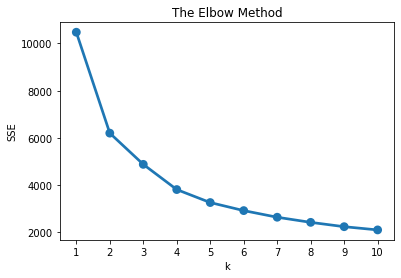

In [330]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [331]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_df_normalized)
model.labels_.shape

(3492,)

In [332]:
rfm_df["Cluster"] = model.labels_
rfm_df.groupby('Cluster').agg({
    'recency':'mean',
    'frequency':'mean',
    'monetary':['mean', 'count']}).round(2)

recency frequency monetary      
           mean      mean     mean count
Cluster                                 
0          8.46      1.71    91.76  1079
1          3.17      3.46   159.91  1046
2          7.81      3.48   165.72  1367

In [333]:
# Create the dataframe
df_normalized = pd.DataFrame(rfm_df_normalized, columns=['recency', 'frequency', 'monetary'])
df_normalized['customer_id'] = rfm_df.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['customer_id', 'Cluster'],
                      value_vars=['recency','frequency','monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt

,customer_id,Cluster,Attribute,Value
0,1,1,recency,-1.362544
1,2,0,recency,1.140212
2,3,2,recency,0.884375
3,4,0,recency,1.649828
4,5,1,recency,-0.795256
...,...,...,...,...
10471,3497,0,monetary,-0.627005
10472,3498,2,monetary,0.278414
10473,3499,2,monetary,0.979119
10474,3500,2,monetary,-0.520373


In [334]:
gb = df_nor_melt.groupby(["customer_id"], as_index = False)['Cluster'].mean()
gb.head()

,customer_id,Cluster
0,1,1
1,2,0
2,3,2
3,4,0
4,5,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


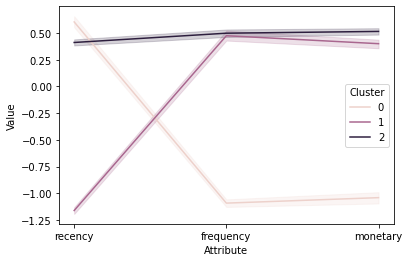

In [335]:
# Visualize it
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

- Most recent buys: cluster 1
- Frequent buyers: cluster 2 and cluster 1
- Top spenders: Cluster 2 and cluster 1

- Cluster 0 dont buy frequently, spend less, and buy the product at the old time. It could be the cluster of unvaluable customers.
- Cluster 1 buy frequently, spend more, and purchased recently. They are the cuyrrent loyal customers.
- Cluster 2 buy frequently, spend more, but purchased at the old time. They are churned customers.

In [336]:
customers_df = customer_data[['customer_id','gender', 'generation', 'age_group', 'job_category','job_industry_category', 'tenure_score', 'wealth_segment', 'owns_car','purchases_score', 'state', 'property_valuation']]

In [337]:
dataframes = [customers_df, gb]
customer_df = reduce(lambda left, right: pd.merge(left, right, on='customer_id', how='left'), dataframes)

customer_df

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score,state,property_valuation,Cluster
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4,NSW,10.0,1.0
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4,NSW,10.0,0.0
2,3,Male,Baby boomers,Retired Age,Manager,Property,3,Mass Customer,Yes,3,NaN,NaN,2.0
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2,QLD,9.0,0.0
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3,NSW,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Female,Gen X,Middle Age,Manager,Health,4,Mass Customer,No,1,VIC,6.0,NaN
3996,3997,Female,Gen Z,Young Adults,Professional,Manufacturing,1,High Net Worth,Yes,4,NSW,2.0,NaN
3997,3998,Unknown,Millennials,Middle Age,Manager,IT,1,High Net Worth,No,3,NSW,6.0,NaN
3998,3999,Male,Gen X,Middle Age,Others,Manufacturing,2,Affluent Customer,Yes,1,VIC,3.0,NaN


In [338]:
customer_df.dropna(inplace=True)

In [339]:
customer_df

,customer_id,gender,generation,age_group,job_category,job_industry_category,tenure_score,wealth_segment,owns_car,purchases_score,state,property_valuation,Cluster
0,1,Female,Baby boomers,Retired Age,Manager,Health,3,Mass Customer,Yes,4,NSW,10.0,1.0
1,2,Male,Millennials,Middle Age,Clerical and admin workers,Financial Services,4,Mass Customer,Yes,4,NSW,10.0,0.0
3,4,Male,Baby boomers,Advanced Age,Others,IT,2,Mass Customer,No,2,QLD,9.0,0.0
4,5,Female,Millennials,Middle Age,Technician and trade worker,Unknown,2,Affluent Customer,Yes,3,NSW,4.0,1.0
5,6,Male,Gen X,Advanced Age,Others,Retail,3,High Net Worth,Yes,2,VIC,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,Male,Millennials,Middle Age,Technician and trade worker,Manufacturing,4,Mass Customer,Yes,4,NSW,9.0,0.0
3496,3497,Female,Millennials,Middle Age,Clerical and admin workers,Manufacturing,4,Affluent Customer,Yes,3,VIC,5.0,0.0
3497,3498,Female,Gen Z,Young Adults,Others,Manufacturing,1,Mass Customer,No,2,VIC,4.0,2.0
3498,3499,Male,Millennials,Middle Age,Others,Manufacturing,2,Mass Customer,Yes,2,QLD,9.0,2.0


In [340]:
# store the customer_id

ids = customer_df.customer_id.copy()

In [352]:
# Get dummies
y = customer_df['Cluster'].values
X = customer_df.drop(['customer_id','Cluster'], axis=1)

X_df = pd.get_dummies(X)
X_df

,property_valuation,gender_Female,gender_Male,gender_Unknown,generation_Traditionalists,generation_Baby boomers,generation_Gen X,generation_Millennials,generation_Gen Z,age_group_Youth,age_group_Young Adults,age_group_Middle Age,age_group_Advanced Age,age_group_Retired Age,job_category_Clerical and admin workers,job_category_Community and personal service workers,job_category_Manager,job_category_Operators and drivers,job_category_Others,job_category_Professional,job_category_Sales workers,job_category_Technician and trade worker,job_category_Technician and trade workers,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,tenure_score_1,tenure_score_2,tenure_score_3,tenure_score_4,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,purchases_score_1,purchases_score_2,purchases_score_3,purchases_score_4,state_NSW,state_QLD,state_VIC
0,10.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,10.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
3,9.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
4,4.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
5,9.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,9.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
3496,5.0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3497,4.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
3498,9.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [353]:
# Initialize the Object
scaler = StandardScaler()

scaler.fit(X_df)
X_normalized = scaler.transform(X_df)

# Assert that it has mean 0 and variance 1
print(X_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(X_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0. -0.  0.  0.
 -0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.
  0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0.  0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


# Features Selection

# Algorithm Selection with PyCaret

In [345]:
!pip install pycaret

     |████████████████████████████████| 266kB 24.3MB/s 
     |████████████████████████████████| 2.0MB 32.7MB/s 
     |████████████████████████████████| 256kB 47.7MB/s 
     |████████████████████████████████| 6.8MB 44.5MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 276kB 47.9MB/s 
     |████████████████████████████████| 1.7MB 37.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 112kB 46.1MB/s 
     |████████████████████████████████| 1.4MB 29.0MB/s 
     |████████████████████████████████| 81kB 1.5MB/s 
     |████████████████████████████████| 14.2MB 173kB/s 
     |████████████████████████████████| 174kB 58.3MB/s 
     |████████████████████████████████| 1.1MB 46.8MB/s 
     |████████████████████████████████| 3.1MB 27.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/

In [346]:
!pip uninstall scikit-learn -y
!pip install scikit-learn version==0.23.2

Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
     |████████████████████████████████| 22.3MB 58.5MB/s 
ERROR: Could not find a version that satisfies the requirement version==0.23.2 (from versions: 0.1.0, 0.1.1)
ERROR: No matching distribution found for version==0.23.2


In [347]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [348]:
columns = X_df.columns

In [349]:
df = pd.DataFrame(X_normalized, columns=columns)
df

,property_valuation,gender_Female,gender_Male,gender_Unknown,generation_Traditionalists,generation_Baby boomers,generation_Gen X,generation_Millennials,generation_Gen Z,age_group_Youth,age_group_Young Adults,age_group_Middle Age,age_group_Advanced Age,age_group_Retired Age,job_category_Clerical and admin workers,job_category_Community and personal service workers,job_category_Manager,job_category_Operators and drivers,job_category_Others,job_category_Professional,job_category_Sales workers,job_category_Technician and trade worker,job_category_Technician and trade workers,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,tenure_score_1,tenure_score_2,tenure_score_3,tenure_score_4,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,purchases_score_1,purchases_score_2,purchases_score_3,purchases_score_4,state_NSW,state_QLD,state_VIC
0,0.880633,0.992000,-0.949632,-0.14929,-0.037899,2.276148,-0.590822,-0.928001,-0.361040,0.0,-0.596125,-0.884941,-0.586405,4.732438,-0.262049,-0.10498,2.594126,-0.119401,-0.41587,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,-0.494526,2.356402,-0.238084,-0.502598,-0.26578,-0.308534,-0.135665,-0.437479,-0.643137,-0.517781,1.722170,-0.567854,-0.567854,-0.586846,1.0,-0.986890,0.986890,-0.587288,-0.577571,-0.577129,1.762387,0.932830,-0.520008,-0.581104
1,0.880633,-1.008065,1.053040,-0.14929,-0.037899,-0.439339,-0.590822,1.077585,-0.361040,0.0,-0.596125,1.130019,-0.586405,-0.211308,3.816084,-0.10498,-0.385486,-0.119401,-0.41587,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,2.022140,-0.424376,-0.238084,-0.502598,-0.26578,-0.308534,-0.135665,-0.437479,-0.643137,-0.517781,-0.580663,1.761016,-0.567854,-0.586846,1.0,-0.986890,0.986890,-0.587288,-0.577571,-0.577129,1.762387,0.932830,-0.520008,-0.581104
2,0.526347,-1.008065,1.053040,-0.14929,-0.037899,2.276148,-0.590822,-0.928001,-0.361040,0.0,-0.596125,-0.884941,1.705307,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,2.40460,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,4.200204,-0.502598,-0.26578,-0.308534,-0.135665,-0.437479,-0.643137,1.931317,-0.580663,-0.567854,-0.567854,-0.586846,1.0,1.013284,-1.013284,-0.587288,1.731389,-0.577129,-0.567412,-1.072007,1.923048,-0.581104
3,-1.245083,0.992000,-0.949632,-0.14929,-0.037899,-0.439339,-0.590822,1.077585,-0.361040,0.0,-0.596125,1.130019,-0.586405,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,-0.41587,-1.107915,-0.198383,9.401309,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,-0.238084,-0.502598,-0.26578,-0.308534,-0.135665,2.285826,-0.643137,1.931317,-0.580663,-0.567854,1.761016,-0.586846,-1.0,-0.986890,0.986890,-0.587288,-0.577571,1.732714,-0.567412,0.932830,-0.520008,-0.581104
4,0.526347,-1.008065,1.053040,-0.14929,-0.037899,-0.439339,1.692556,-0.928001,-0.361040,0.0,-0.596125,-0.884941,1.705307,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,2.40460,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,-0.238084,-0.502598,-0.26578,3.241134,-0.135665,-0.437479,-0.643137,-0.517781,1.722170,-0.567854,-0.567854,1.704023,-1.0,-0.986890,0.986890,-0.587288,1.731389,-0.577129,-0.567412,-1.072007,-0.520008,1.720861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,0.526347,-1.008065,1.053040,-0.14929,-0.037899,-0.439339,-0.590822,1.077585,-0.361040,0.0,-0.596125,1.130019,-0.586405,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,-0.41587,-1.107915,-0.198383,9.401309,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,-0.238084,1.989660,

In [354]:
df['target'] = y
df

,property_valuation,gender_Female,gender_Male,gender_Unknown,generation_Traditionalists,generation_Baby boomers,generation_Gen X,generation_Millennials,generation_Gen Z,age_group_Youth,age_group_Young Adults,age_group_Middle Age,age_group_Advanced Age,age_group_Retired Age,job_category_Clerical and admin workers,job_category_Community and personal service workers,job_category_Manager,job_category_Operators and drivers,job_category_Others,job_category_Professional,job_category_Sales workers,job_category_Technician and trade worker,job_category_Technician and trade workers,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,job_industry_category_Unknown,tenure_score_1,tenure_score_2,tenure_score_3,tenure_score_4,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,purchases_score_1,purchases_score_2,purchases_score_3,purchases_score_4,state_NSW,state_QLD,state_VIC,target
0,0.880633,0.992000,-0.949632,-0.14929,-0.037899,2.276148,-0.590822,-0.928001,-0.361040,0.0,-0.596125,-0.884941,-0.586405,4.732438,-0.262049,-0.10498,2.594126,-0.119401,-0.41587,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,-0.494526,2.356402,-0.238084,-0.502598,-0.26578,-0.308534,-0.135665,-0.437479,-0.643137,-0.517781,1.722170,-0.567854,-0.567854,-0.586846,1.0,-0.986890,0.986890,-0.587288,-0.577571,-0.577129,1.762387,0.932830,-0.520008,-0.581104,1.0
1,0.880633,-1.008065,1.053040,-0.14929,-0.037899,-0.439339,-0.590822,1.077585,-0.361040,0.0,-0.596125,1.130019,-0.586405,-0.211308,3.816084,-0.10498,-0.385486,-0.119401,-0.41587,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,2.022140,-0.424376,-0.238084,-0.502598,-0.26578,-0.308534,-0.135665,-0.437479,-0.643137,-0.517781,-0.580663,1.761016,-0.567854,-0.586846,1.0,-0.986890,0.986890,-0.587288,-0.577571,-0.577129,1.762387,0.932830,-0.520008,-0.581104,0.0
2,0.526347,-1.008065,1.053040,-0.14929,-0.037899,2.276148,-0.590822,-0.928001,-0.361040,0.0,-0.596125,-0.884941,1.705307,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,2.40460,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,4.200204,-0.502598,-0.26578,-0.308534,-0.135665,-0.437479,-0.643137,1.931317,-0.580663,-0.567854,-0.567854,-0.586846,1.0,1.013284,-1.013284,-0.587288,1.731389,-0.577129,-0.567412,-1.072007,1.923048,-0.581104,0.0
3,-1.245083,0.992000,-0.949632,-0.14929,-0.037899,-0.439339,-0.590822,1.077585,-0.361040,0.0,-0.596125,1.130019,-0.586405,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,-0.41587,-1.107915,-0.198383,9.401309,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,-0.238084,-0.502598,-0.26578,-0.308534,-0.135665,2.285826,-0.643137,1.931317,-0.580663,-0.567854,1.761016,-0.586846,-1.0,-0.986890,0.986890,-0.587288,-0.577571,1.732714,-0.567412,0.932830,-0.520008,-0.581104,1.0
4,0.526347,-1.008065,1.053040,-0.14929,-0.037899,-0.439339,1.692556,-0.928001,-0.361040,0.0,-0.596125,-0.884941,1.705307,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,2.40460,-1.107915,-0.198383,-0.106368,-0.187178,-0.171853,-0.191245,-0.494526,-0.424376,-0.238084,-0.502598,-0.26578,3.241134,-0.135665,-0.437479,-0.643137,-0.517781,1.722170,-0.567854,-0.567854,1.704023,-1.0,-0.986890,0.986890,-0.587288,1.731389,-0.577129,-0.567412,-1.072007,-0.520008,1.720861,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,0.526347,-1.008065,1.053040,-0.14929,-0.037899,-0.439339,-0.590822,1.077585,-0.361040,0.0,-0.596125,1.130019,-0.586405,-0.211308,-0.262049,-0.10498,-0.385486,-0.119401,-0.41587,-1.107915,-0.198383,9.401309,-0.187178,-0.171853,-0.191245,-0.49452

In [355]:
pip install scikit_learn

  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.
ERROR: pycaret 2.3.1 has requirement scikit-learn==0.23.2, but you'll have scikit-learn 0.24.2 which is incompatible.


In [356]:
pip install "scikit_learn==0.22.2.post1"

     |████████████████████████████████| 7.1MB 28.2MB/s 
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement pandas>=1.2.0, but you'll have pandas 1.1.5 which is incompatible.
ERROR: pycaret 2.3.1 has requirement scikit-learn==0.23.2, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
ERROR: imbalanced-learn 0.7.0 has requirement scikit-learn>=0.23, but you'll have scikit-learn 0.22.2.post1 which is incompatible.
  Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [357]:
from pycaret.classification import * 

In [358]:
cls = setup( df, target = 'target', imputation_type='iterative')

,Description,Value
0,session_id,7665
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3486, 50)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,47
8,Ordinal Features,False
9,High Cardinality Features,False


In [359]:
# return best model based on AUC
best = compare_models(sort = 'AUC') #default is 'Accuracy'

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3807,0.5179,0.3493,0.3539,0.3413,0.0279,0.0303,0.492
lda,Linear Discriminant Analysis,0.3828,0.5175,0.3519,0.3580,0.3450,0.0318,0.0344,0.032
ada,Ada Boost Classifier,0.3852,0.5159,0.3543,0.3639,0.3478,0.0350,0.0384,0.150
dt,Decision Tree Classifier,0.3574,0.5152,0.3542,0.3597,0.3579,0.0306,0.0307,0.027
gbc,Gradient Boosting Classifier,0.3553,0.5044,0.3306,0.3337,0.3293,-0.0034,-0.0035,0.903
knn,K Neighbors Classifier,0.3344,0.5018,0.3367,0.3442,0.3338,0.0058,0.0059,0.126
qda,Quadratic Discriminant Analysis,0.3439,0.5001,0.3337,0.3392,0.3191,0.0003,0.0015,0.030
lightgbm,Light Gradient Boosting Machine,0.3381,0.4993,0.3232,0.3276,0.3297,-0.0134,-0.0137,0.234
nb,Naive Bayes,0.3176,0.4967,0.3240,0.3152,0.2886,-0.0125,-0.0180,0.017
rf,Random Forest Classifier,0.3496,0.4961,0.3317,0.3365,0.3365,-0.0024,-0.0024,0.652


In [360]:
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.3852,0.0000,0.3527,0.3597,0.3433,0.0332,0.0364,0.016
ada,Ada Boost Classifier,0.3852,0.5159,0.3543,0.3639,0.3478,0.0350,0.0384,0.154
lda,Linear Discriminant Analysis,0.3828,0.5175,0.3519,0.3580,0.3450,0.0318,0.0344,0.030
lr,Logistic Regression,0.3807,0.5179,0.3493,0.3539,0.3413,0.0279,0.0303,0.242
dt,Decision Tree Classifier,0.3574,0.5152,0.3542,0.3597,0.3579,0.0306,0.0307,0.025
gbc,Gradient Boosting Classifier,0.3553,0.5044,0.3306,0.3337,0.3293,-0.0034,-0.0035,0.923
rf,Random Forest Classifier,0.3496,0.4961,0.3317,0.3365,0.3365,-0.0024,-0.0024,0.648
svm,SVM - Linear Kernel,0.3480,0.0000,0.3409,0.3578,0.2753,0.0133,0.0254,0.109
qda,Quadratic Discriminant Analysis,0.3439,0.5001,0.3337,0.3392,0.3191,0.0003,0.0015,0.021
lightgbm,Light Gradient Boosting Machine,0.3381,0.4993,0.3232,0.3276,0.3297,-0.0134,-0.0137,0.196


https://towardsdatascience.com/customer-segmentation-in-python-9c15acf6f945
https://github.com/erenonal/K-means_customer_segmentation/blob/main/K-means_segmentation.ipynb


# Models development

## Models training

## Models evaluation and comparison

## Best model tuning

## Save model

# Apply model on New Customers Dataset